In [1]:
# Import path to source directory (bit of a hack in Jupyter)
import sys
import os
pwd = %pwd
sys.path.append(os.path.join(pwd, os.path.join('..', 'src')))

# Ensure modules are reloaded on any change (very useful when developing code on the fly)
%load_ext autoreload
%autoreload 2

In [2]:
# Import external libraries
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# initialization
from objfun_node2vec import N2V
n2v = N2V('../data/clear_cluster_test/one_eighth.csv',
            '../data/clear_cluster_test/labels.csv')

In [4]:
from heur_fsa import FastSimulatedAnnealing
from heur_aux import Correction, CauchyMutation

In [5]:
NUM_RUNS = 50 
maxeval = 50 

In [6]:
default_params=[1., 10, 80, 10]

### Node2vec optimisation using FSA

In [7]:
def experiment_fsa(of, maxeval, num_runs, T0, n0, alpha, r, params):
    results = []
    for i in tqdm(range(num_runs), 'Testing T0={}, n0={}, alpha={}, r={}'.format(T0, n0, alpha, r)):
        mut = CauchyMutation(r=r, correction=Correction(of))
        result = FastSimulatedAnnealing(of, maxeval=maxeval, 
                                        T0=T0, n0=n0, alpha=alpha, 
                                        mutation=mut,params=params).search()
        result['run'] = i
        result['heur'] = 'FSA_{}_{}_{}_{}'.format(T0, n0, alpha, r) # name of the heuristic
        result['T0'] = T0
        result['n0'] = n0
        result['alpha'] = alpha
        result['r'] = r
        results.append(result)
    
    return pd.DataFrame(results, columns=['heur', 'run', 'T0', 'n0', 'alpha', 'r', 'best_x', 'best_y', 'neval'])

In [8]:
table_fsa = pd.DataFrame()

for T0 in [1e-10, 1e-2, 1, np.inf]: 
    res = experiment_fsa(of=n2v, maxeval=maxeval, num_runs=NUM_RUNS, 
                         T0=T0, n0=1, alpha=2, r=0.5,params=default_params)
    table_fsa = pd.concat([table_fsa, res], axis=0)

In [9]:
table_fsa.head()

,heur,run,T0,n0,alpha,r,best_x,best_y,neval
0,FSA_1e-10_1_2_0.5,0,1.000000e-10,1,2,0.5,"[[1.6187386246265323], 1.0, 10, 80, 10]",0.450382,inf
1,FSA_1e-10_1_2_0.5,1,1.000000e-10,1,2,0.5,"[[0.14831554722947535], 1.0, 10, 80, 10]",0.406250,inf
2,FSA_1e-10_1_2_0.5,2,1.000000e-10,1,2,0.5,"[[1.0009825134048458], 1.0, 10, 80, 10]",0.377778,inf
3,FSA_1e-10_1_2_0.5,3,1.000000e-10,1,2,0.5,"[[0.32646452930716313], 1.0, 10, 80, 10]",0.375000,inf
4,FSA_1e-10_1_2_0.5,4,1.000000e-10,1,2,0.5,"[3.590537838471784, 1.0, 10, 80, 10]",0.425781,inf


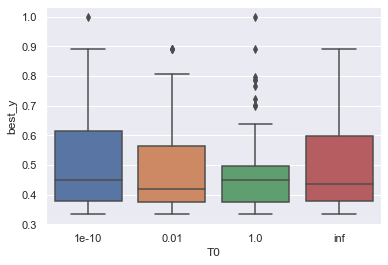

In [10]:
ax = sns.boxplot(x="T0", y="best_y", data=table_fsa)

In [63]:
table_fsa['neval'].unique()

array([inf,  1.])


FSA did not reach the optimal value in $683$ experiments, and in $17$ cases it hit the optima at the first run. 

So, the MNE value is not credible in that case. 

In [64]:
table_fsa['neval'].value_counts()

inf    683
1.0     17
Name: neval, dtype: int64

In [62]:
table_fsa[table_fsa['neval']==1]

,heur,run,T0,n0,alpha,r,best_x,best_y,neval
45,FSA_1e-10_1_2_0.5,45,1.000000e-10,1,2,0.50,"[0.5301305157941014, 1.0, 10, 80, 10]",1.0,1.0
4,FSA_1_1_2_0.5,4,1.000000e+00,1,2,0.50,"[0.16119202051742665, 1.0, 10, 80, 10]",1.0,1.0
21,FSA_1e-10_3_2_0.5,21,1.000000e-10,3,2,0.50,"[0.9614717247928732, 1.0, 10, 80, 10]",1.0,1.0
35,FSA_1e-10_3_2_0.5,35,1.000000e-10,3,2,0.50,"[0.5971624967697298, 1.0, 10, 80, 10]",1.0,1.0
17,FSA_1e-10_5_2_0.5,17,1.000000e-10,5,2,0.50,"[0.9133419365298909, 1.0, 10, 80, 10]",1.0,1.0
27,FSA_1e-10_5_2_0.5,27,1.000000e-10,5,2,0.50,"[0.5081889455482225, 1.0, 10, 80, 10]",1.0,1.0
6,FSA_1e-10_10_2_0.5,6,1.000000e-10,10,2,0.50,"[0.3570820400026937, 1.0, 10, 80, 10]",1.0,1.0
17,FSA_1e-10_10_2_0.5,17,1.000000e-10,10,2,0.50,"[0.49962662066241004, 1.0, 10, 80, 10]",1.0,1.0
3,FSA_1e-10_5_2_0.01,3,1.000000e-10,5,2,0.01,"[0.32049505723231153, 1.0, 10, 80, 10]",1.0,1.0
29,FSA_1e-10_5_2_0.01,29,1.000000e-10,5,2,0.01,"[0.49573386493118576, 1.0, 10, 80, 10]",1.0,1.0


In [11]:
def rel(x):
    return len([n for n in x if n < np.inf])/len(x)

def mne(x):
    return np.mean([n for n in x if n < np.inf])

def feo(x):
    return mne(x)/rel(x)

In [12]:
stats_fsa = table_fsa.pivot_table(
    index=['heur', 'T0'],
    
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
stats_fsa = stats_fsa.reset_index()
stats_fsa.sort_values(by=['T0'])

C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,heur,T0,feo,mne,rel
2,FSA_1e-10_1_2_0.5,1.000000e-10,50.0,1.0,0.02
0,FSA_0.01_1_2_0.5,1.000000e-02,NaN,NaN,0.00
1,FSA_1_1_2_0.5,1.000000e+00,50.0,1.0,0.02
3,FSA_inf_1_2_0.5,inf,NaN,NaN,0.00


### Can the best configuration ($T_0=1e-10$) be improved?

In [22]:
# maxeval 1000
heur = FastSimulatedAnnealing(n2v, maxeval=maxeval, T0=1e-10, n0=1, alpha=2, 
                              mutation=CauchyMutation(r=0.5, correction=Correction(n2v)),
                             params=default_params)
result = heur.search()
print('neval = {}'.format(result['neval']))
print('best_x = {}'.format(result['best_x']))
print('best_y = {}'.format(result['best_y']))

neval = inf
best_x = [array([4.125]), 1.0, 10, 80, 10]
best_y = 0.3333333333333333


In [23]:
log_data = result['log_data'].copy()
log_data = log_data[['step', 'x', 'f_x', 'y', 'f_y', 'T', 'swap']]  # column re-ordering, for better readability
log_data.head(10)

,step,x,f_x,y,f_y,T,swap
0,0,3.80153,0.128676,[2.5400654139646712],0.265306,1.000000e-10,True
1,1,[2.5400654139646712],0.265306,[1.198963503444385],0.265306,5.000000e-11,False
2,2,[2.5400654139646712],0.265306,[3.26135613574748],0.265306,2.000000e-11,True
3,3,[3.26135613574748],0.265306,[3.34414661137345],0.222222,1.000000e-11,False
4,4,[3.26135613574748],0.265306,[3.1197508137503793],0.265306,5.882353e-12,True
5,5,[3.1197508137503793],0.265306,[3.796369852271816],0.260714,3.846154e-12,False
6,6,[3.1197508137503793],0.265306,[3.3900973595700696],0.222222,2.702703e-12,False
7,7,[3.1197508137503793],0.265306,[3.1282522195164715],0.265306,2.000000e-12,True
8,8,[3.1282522195164715],0.265306,[3.2356848563015865],0.265306,1.538462e-12,False
9,9,[3.1282522195164715],0.265306,[1.8774924145691791],0.265306,1.219512e-12,False


In [24]:
def plot_compare(step_data, ax1_col, ax1_label, ax2_col, ax2_label):
    fig, ax1 = plt.subplots()

    k = step_data.index.values
    T = step_data[ax1_col]
    ax1.plot(k, T, 'b-')
    ax1.set_xlabel('Step')
    ax1.set_ylabel(ax1_label, color='b')
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    s2 = step_data[ax2_col]
    ax2.plot(k, s2, 'r.')
    ax2.set_ylabel(ax2_label, color='r')
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()

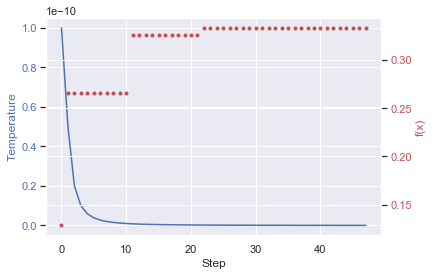

In [25]:
plot_compare(log_data, 'T', 'Temperature', 'f_x', 'f(x)')

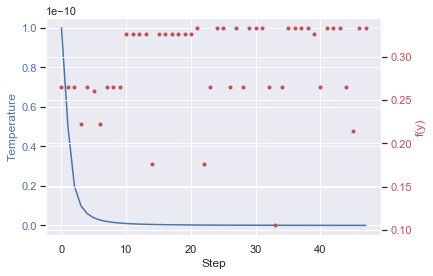

In [26]:
plot_compare(log_data, 'T', 'Temperature', 'f_y', 'f(y)')

__$n_0$ doubled:__

In [27]:
# maxeval=50
heur = FastSimulatedAnnealing(n2v, maxeval=maxeval, T0=1e-10, n0=2, alpha=2, 
                              mutation=CauchyMutation(r=0.5, correction=Correction(n2v)),
                             params=default_params)
result = heur.search()
print('neval = {}'.format(result['neval']))
print('best_x = {}'.format(result['best_x']))
print('best_y = {}'.format(result['best_y']))

neval = inf
best_x = [1.2626445132562205, 1.0, 10, 80, 10]
best_y = 0.585820895522388


In [28]:
log_data = result['log_data'].copy()
log_data = log_data[['step', 'x', 'f_x', 'y', 'f_y', 'T', 'swap']]  
# column re-ordering, for better readability

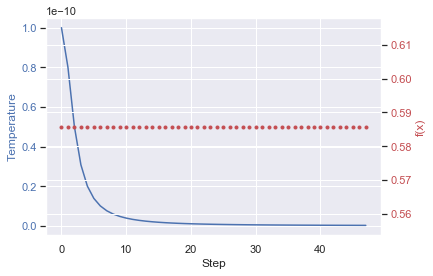

In [29]:
plot_compare(log_data, 'T', 'Temperature', 'f_x', 'f(x)')

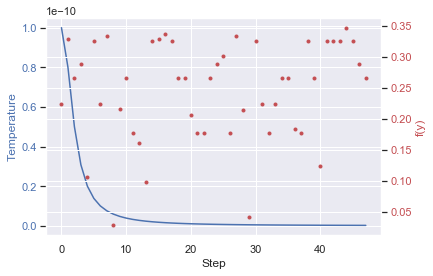

In [30]:
plot_compare(log_data, 'T', 'Temperature', 'f_y', 'f(y)')

__More thorough testing:__

In [31]:
# cooling strategy parameter testing
for n0 in [2, 3, 5, 10]:
    res = experiment_fsa(of=n2v, maxeval=maxeval, num_runs=NUM_RUNS, T0=1e-10, n0=n0, alpha=2, r=0.5,
                        params=default_params)
    table_fsa = pd.concat([table_fsa, res], axis=0)

In [32]:
stats_fsa = table_fsa.pivot_table(
    index=['heur', 'T0', 'n0'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
stats_fsa = stats_fsa.reset_index()
stats_fsa.sort_values(by=['T0', 'n0'])

C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,heur,T0,n0,feo,mne,rel
3,FSA_1e-10_1_2_0.5,1.000000e-10,1,50.0,1.0,0.02
4,FSA_1e-10_2_2_0.5,1.000000e-10,2,NaN,NaN,0.00
5,FSA_1e-10_3_2_0.5,1.000000e-10,3,25.0,1.0,0.04
6,FSA_1e-10_5_2_0.5,1.000000e-10,5,25.0,1.0,0.04
2,FSA_1e-10_10_2_0.5,1.000000e-10,10,25.0,1.0,0.04
0,FSA_0.01_1_2_0.5,1.000000e-02,1,NaN,NaN,0.00
1,FSA_1_1_2_0.5,1.000000e+00,1,50.0,1.0,0.02
7,FSA_inf_1_2_0.5,inf,1,NaN,NaN,0.00


__Is the mutation $r$ adequate?__

In [33]:
log_data['jump_length'] = log_data.apply(lambda r: np.linalg.norm(r['x'] - r['y']), axis=1)
log_data.head(10)

,step,x,f_x,y,f_y,T,swap,jump_length
0,0,1.262645,0.585821,[1.6622774203713457],0.224490,1.000000e-10,False,0.399633
1,1,1.262645,0.585821,[0.47725558775117816],0.328671,8.000000e-11,False,0.785389
2,2,1.262645,0.585821,[1.4873424064678944],0.265306,5.000000e-11,False,0.224698
3,3,1.262645,0.585821,[0.9205657391577463],0.287770,3.076923e-11,False,0.342079
4,4,1.262645,0.585821,[1.7465483812885165],0.105263,2.000000e-11,False,0.483904
5,5,1.262645,0.585821,[0.125],0.325581,1.379310e-11,False,1.137645
6,6,1.262645,0.585821,[1.6667518008692639],0.224490,1.000000e-11,False,0.404107
7,7,1.262645,0.585821,[4.125],0.333333,7.547170e-12,False,2.862355
8,8,1.262645,0.585821,[1.329397539970571],0.027933,5.882353e-12,False,0.066753
9,9,1.262645,0.585821,[1.055785735356008],0.215686,4.705882e-12,False,0.206859


In [34]:
log_data['jump_length'].describe()

count    48.000000
mean      0.727042
std       0.596869
min       0.066753
25%       0.318033
50%       0.560860
75%       1.137645
max       2.862355
Name: jump_length, dtype: float64

In [35]:
for r in [0.001,0.01,.1, .25, .75, 1]:
    res = experiment_fsa(of=n2v, maxeval=maxeval, num_runs=NUM_RUNS, T0=1e-10, n0=5, alpha=2, r=r,
                        params=default_params)
    table_fsa = pd.concat([table_fsa, res], axis=0)

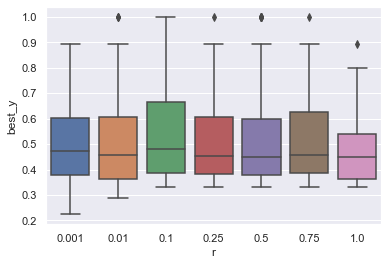

In [40]:
ax = sns.boxplot(x="r", y="best_y", data=table_fsa)

In [46]:
table_fsa['best_y'].mean()

0.5057760208262176

In [48]:
table_fsa['best_y'].median()

0.45038167938931295

In [49]:
table_fsa['best_y'].mode()

0    0.333333
dtype: float64

In [45]:
table_fsa['best_y'].max()

1.0

In [36]:
stats_fsa = table_fsa.pivot_table(
    index=['heur', 'T0', 'n0', 'r'],
    values=['neval'],
    aggfunc=(rel, mne, feo)
)['neval']
stats_fsa = stats_fsa.reset_index()
stats_fsa.sort_values(by=['T0', 'n0', 'r'])

C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Adeliia\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,heur,T0,n0,r,feo,mne,rel
3,FSA_1e-10_1_2_0.5,1.000000e-10,1,0.500,50.000000,1.0,0.02
4,FSA_1e-10_2_2_0.5,1.000000e-10,2,0.500,NaN,NaN,0.00
5,FSA_1e-10_3_2_0.5,1.000000e-10,3,0.500,25.000000,1.0,0.04
6,FSA_1e-10_5_2_0.001,1.000000e-10,5,0.001,NaN,NaN,0.00
7,FSA_1e-10_5_2_0.01,1.000000e-10,5,0.010,16.666667,1.0,0.06
8,FSA_1e-10_5_2_0.1,1.000000e-10,5,0.100,12.500000,1.0,0.08
9,FSA_1e-10_5_2_0.25,1.000000e-10,5,0.250,50.000000,1.0,0.02
10,FSA_1e-10_5_2_0.5,1.000000e-10,5,0.500,25.000000,1.0,0.04
11,FSA_1e-10_5_2_0.75,1.000000e-10,5,0.750,50.000000,1.0,0.02
12,FSA_1e-10_5_2_1,1.000000e-10,5,1.000,NaN,NaN,0.00


The best performing instance of FSA, according to $FEO$:

In [39]:
stats_fsa.sort_values(by=['feo']).head(5)

,heur,T0,n0,r,feo,mne,rel
8,FSA_1e-10_5_2_0.1,1.000000e-10,5,0.10,12.500000,1.0,0.08
7,FSA_1e-10_5_2_0.01,1.000000e-10,5,0.01,16.666667,1.0,0.06
2,FSA_1e-10_10_2_0.5,1.000000e-10,10,0.50,25.000000,1.0,0.04
5,FSA_1e-10_3_2_0.5,1.000000e-10,3,0.50,25.000000,1.0,0.04
10,FSA_1e-10_5_2_0.5,1.000000e-10,5,0.50,25.000000,1.0,0.04


## Conclusion

- FSA performed similarly at the initial temperature $T0 = 1e-2$ and $T0 = 1$.
- An attempt to increase the objective function value by changing the $r$ mutation
parameter also was not successful.
- FSA did not reach the optimal value in $683$ experiments, and in $17$ cases it achieved
the optima at the first run. It can be assumed that this behaviour is not trustable,
and the optimal values are just random. So, the MNE values are not credible in that
case.